In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cleaning

In [180]:
# import data
DS_data = pd.read_csv('./data/data_science_scrape4.csv')
DA_data = pd.read_csv('./data/data_analyst_scrape4.csv')
BI_data = pd.read_csv('./data/business_intelligence_scrape4.csv')

In [181]:
# append data together
data= DS_data.append(DA_data, ignore_index=True)
data = data.append(BI_data, ignore_index=True)

In [182]:
print(data.shape)
data.head()

(6207, 8)


,Unnamed: 0,Title,Location,Company,Salary,Link,Description,Category
0,0,IT Internship,Sydney NSW,Global group,None,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,An Sydney based company is currently looking f...,data science
1,1,Data CoE Expressions of Interest,Sydney NSW,Optus,None,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,We're going where no other telco has gone befo...,data science
2,2,Data Scientist,Sydney NSW,Accenture,None,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Flexible work arrangements to meet your needs\...,data science
3,3,Data Scientist - Contractor,Sydney NSW,Mphasis,None,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"Job Description :\nIn this role, you should be...",data science
4,4,Data Scientist,Sydney Central Business District NSW,Westpac,None,https://au.indeed.com/rc/clk?jk=3bd8bb6cec4745...,As a Data Scientist you will support our compl...,data science


In [183]:
# drop duplicated results
data.drop(['Category'], axis=1, inplace=True)
data.drop_duplicates(subset= ['Title', 'Location','Company','Salary'], keep='first', inplace=True)

In [184]:
print(data.shape)
data.head()

(798, 7)


,Unnamed: 0,Title,Location,Company,Salary,Link,Description
0,0,IT Internship,Sydney NSW,Global group,None,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,An Sydney based company is currently looking f...
1,1,Data CoE Expressions of Interest,Sydney NSW,Optus,None,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,We're going where no other telco has gone befo...
2,2,Data Scientist,Sydney NSW,Accenture,None,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Flexible work arrangements to meet your needs\...
3,3,Data Scientist - Contractor,Sydney NSW,Mphasis,None,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"Job Description :\nIn this role, you should be..."
4,4,Data Scientist,Sydney Central Business District NSW,Westpac,None,https://au.indeed.com/rc/clk?jk=3bd8bb6cec4745...,As a Data Scientist you will support our compl...


In [185]:
data.Title.value_counts()

Data Analyst                                                                   51
Data Scientist                                                                 36
            Senior Data Scientist                                              22
Business Analyst                                                               10
Business Intelligence Analyst                                                  10
            Senior Data Analyst                                                10
            Technical Business Analyst                                          5
            BI Developer                                                        5
            Data Engineer                                                       5
            Marketing Data Analyst                                              4
            Manager Systems Intelligence and Analytics                          3
            Lead Data Scientist                                                 3
Business Intelli

In [186]:
# job Title fix
def title_fixer(row):
    if "Business Analyst" in row['Title']:
        return "Business Analyst"
    elif "Data Scientist" in row['Title']:
        return "Data Scientist"
    elif "data scientist" in row['Title']:
        return "Data Scientist"
    elif "Data scientist" in row['Title']:
        return "Data Scientist"
    elif "Data Science" in row['Title']:
        return "Data Scientist"
    elif "Data analyst" in row['Title']:
        return "Data Analyst"
    elif "Data Analyst" in row['Title']:
        return "Data Analyst"
    elif "data analyst" in row['Title']:
        return "Data Analyst"
    elif "Data Anayst" in row['Title']:
        return "Data Analyst"
    elif "Business Intelligence" in row['Title']:
        return "Business Intelligence"
    elif "BI" in row['Title']:
        return "Business Intelligence"
    elif "Data Analytics" in row['Title']:
        return "Data Analyst"
    elif "Data & Analytics" in row['Title']:
        return "Data Analyst"
    elif "Engineer" in row['Title']:
        return "Data Engineer"
    elif "Data Consultant" in row['Title']:
        return "Data Scientist"
    elif "Insight" in row['Title']:
        return "Data Analyst"
    elif "Insight and Reporting" in row['Title']:
        return "Data Analyst"
    elif "Insight & Reporting" in row['Title']:
        return "Data Analyst"
    elif "Analyst" in row['Title']:
        return "Data Analyst"
    elif "Reporting Analyst" in row['Title']:
        return "Data Analyst"
    elif "Artificial Intelligence" in row['Title']:
        return "Data Scientist"
    elif "Machine Learning" in row['Title']:
        return "Data Scientist"
    elif 'Modeller'in row['Title']:
        return "Data Scientist"
    else:
        return "Error"


In [187]:
data['title_fix']= data.apply (lambda row: title_fixer(row), axis=1)

In [188]:
data.title_fix.value_counts()

Data Analyst             241
Error                    228
Data Scientist           131
Business Intelligence    106
Business Analyst          51
Data Engineer             41
Name: title_fix, dtype: int64

In [189]:
data[data.title_fix == 'Error']

,Unnamed: 0,Title,Location,Company,Salary,Link,Description,title_fix
0,0,IT Internship,Sydney NSW,Global group,None,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,An Sydney based company is currently looking f...,Error
1,1,Data CoE Expressions of Interest,Sydney NSW,Optus,None,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,We're going where no other telco has gone befo...,Error
39,39,"ADMINISTRATOR, DATA SYSTEMS",Sydney Olympic Park NSW,New South Wales Institute of Sport,"$58,933 - $63,354 a year",https://au.indeed.com/rc/clk?jk=a0242cc66f9743...,The Data Systems Administrator is accountable ...,Error
139,139,"IT / Tech Recruitment Consultants,...",Sydney NSW,TheDriveGroup,"$100,000 - $300,000 a year",https://au.indeed.com/rc/clk?jk=e9003e314fa1ee...,"TheDriveGroup: Driven by Technology, Powered b...",Error
147,147,Head,Sydney NSW,Hydrogen Group,None,https://au.indeed.com/rc/clk?jk=0b00a255a086e8...,About our Client:\nMy client is a leader in he...,Error
148,148,Technical Product Manager,Sydney NSW,Talenza,None,https://au.indeed.com/rc/clk?jk=48ba41e53c644c...,"My client is an innovating Health Start up, th...",Error
149,149,Senior Pre Sales Consultant,Sydney NSW,CITI Recruitment,None,https://au.indeed.com/rc/clk?jk=f995352ea1335a...,CITI Recruitment is seeking a Senior Pre Sales...,Error
215,215,Senior Data Marketing Strategist,Melbourne VIC,AKQA,None,https://au.indeed.com/rc/clk?jk=43940450b7ca40...,"At AKQA, we believe in the imaginative applica...",Error
217,217,Senior Digital Producer - Adobe Ca...,Melbourne VIC,Clemenger Group,None,https://au.indeed.com/rc/clk?jk=8d0369543b23ab...,WHO ARE CHE PROXIMTY\n‘Advertising'\nIt's not ...,Error
476,181,Senior Policy Adviser- Superannuat...,None,CHOICE,"$90,000 a year",https://au.indeed.com/rc/clk?jk=7d248b328e17de...,CHOICE and the Superannuation Consumers’ Centr...,Error


In [190]:
# drop Error rows 
data = data.loc[data.title_fix != "Error"]

In [191]:
print(data.shape)
data.head()

(570, 8)


,Unnamed: 0,Title,Location,Company,Salary,Link,Description,title_fix
2,2,Data Scientist,Sydney NSW,Accenture,None,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Flexible work arrangements to meet your needs\...,Data Scientist
3,3,Data Scientist - Contractor,Sydney NSW,Mphasis,None,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"Job Description :\nIn this role, you should be...",Data Scientist
4,4,Data Scientist,Sydney Central Business District NSW,Westpac,None,https://au.indeed.com/rc/clk?jk=3bd8bb6cec4745...,As a Data Scientist you will support our compl...,Data Scientist
5,5,Deloitte Digital - Data Scientist,Sydney NSW,Deloitte,None,https://au.indeed.com/rc/clk?jk=2328bba800bf9f...,Digital Data Scientist World-class learning an...,Data Scientist
6,6,Junior data scientist/machine lear...,Sydney NSW,Intellify,None,https://au.indeed.com/rc/clk?jk=0758a505fd7432...,"About Intellify Intellify is a data science, m...",Data Scientist


In [192]:
# experience function
def experience_finder(row):
    if "Senior" in row['Title']:
        return "Senior"
    elif "Manager" in row['Title']:
        return "Senior"
    elif "Lead" in row['Title']:
        return "Senior"
    elif "Junior" in row['Title']:
        return "Junior"
    elif "Head" in row['Title']:
        return "Senior"
    else:
        return "Mid"

In [193]:
data['experience']= data.apply (lambda row: experience_finder(row), axis=1)

In [194]:
data.experience.value_counts()

Mid       416
Senior    144
Junior     10
Name: experience, dtype: int64

In [195]:
data['Location'].value_counts()

None                                    400
Sydney NSW                               86
Melbourne VIC                            57
Sydney Central Business District NSW      8
Northern Beaches NSW                      3
Barangaroo NSW                            2
Moonee Ponds VIC                          2
Westmead NSW                              2
Macquarie Park NSW                        2
Richmond VIC                              1
Bella Vista NSW                           1
North Shore NSW                           1
Parramatta NSW                            1
Sydney Western Suburbs NSW                1
Melbourne City Centre VIC                 1
Sydney Eastern Suburbs NSW                1
Darlinghurst NSW                          1
Name: Location, dtype: int64

In [196]:
# location Fix
def loc_fix(row):
    if 'NSW' in row['Location']:
        return 'Sydney'
    elif 'VIC' in row['Location']:
        return 'Melbourne'
    else:
        return 'Location Unknown'

In [197]:
# apply function
data['location']= data.apply (lambda row: loc_fix(row), axis=1)

In [200]:
print(data.shape)
data.head()

(570, 10)


,Unnamed: 0,Title,Location,Company,Salary,Link,Description,title_fix,experience,location
2,2,Data Scientist,Sydney NSW,Accenture,None,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Flexible work arrangements to meet your needs\...,Data Scientist,Mid,Sydney
3,3,Data Scientist - Contractor,Sydney NSW,Mphasis,None,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"Job Description :\nIn this role, you should be...",Data Scientist,Mid,Sydney
4,4,Data Scientist,Sydney Central Business District NSW,Westpac,None,https://au.indeed.com/rc/clk?jk=3bd8bb6cec4745...,As a Data Scientist you will support our compl...,Data Scientist,Mid,Sydney
5,5,Deloitte Digital - Data Scientist,Sydney NSW,Deloitte,None,https://au.indeed.com/rc/clk?jk=2328bba800bf9f...,Digital Data Scientist World-class learning an...,Data Scientist,Mid,Sydney
6,6,Junior data scientist/machine lear...,Sydney NSW,Intellify,None,https://au.indeed.com/rc/clk?jk=0758a505fd7432...,"About Intellify Intellify is a data science, m...",Data Scientist,Junior,Sydney


In [201]:
data.Salary.value_counts()

None                                          412
                $100,000 - $120,000 a year      9
                $110,000 a year                 5
                $115,000 a year                 4
                $100,000 a year                 4
                $110,000 - $120,000 a year      4
                $120,000 - $140,000 a year      4
                $130,000 - $140,000 a year      3
                $140,000 a year                 3
                $120,000 - $160,000 a year      3
                $80,000 - $100,000 a year       3
                $90,000 a year                  3
                $130,000 - $150,000 a year      3
                $130,000 a year                 3
                $150,000 a year                 3
                $120,000 - $150,000 a year      3
                $100,000 - $110,000 a year      3
                $600 - $800 a day               2
                $73,636 - $78,873 a year        2
                $110,000 - $125,000 a year      2


In [202]:
# work type
def work_type(row):
    if "year" in row['Salary']:
        return "Full Time"
    if "day" in row['Salary']:
        return "Contract"
    if "week" in row['Salary']:
        return "Contract"
    if "month" in row['Salary']:
        return "Contract"
    if "hour" in row['Salary']:
        return "Contract"
    else:
        return "Work Type Unknown"

In [203]:
# salary frequency
def sal_freq(row):
    if "year" in row['Salary']:
        return "year"
    if "day" in row['Salary']:
        return "day"
    if "week" in row['Salary']:
        return "week"
    if "month" in row['Salary']:
        return "month"
    if "hour" in row['Salary']:
        return "hour"
    else:
        return "Salary Frequency Unknown"

In [204]:
data['sal_freq']= data.apply (lambda row: sal_freq(row), axis=1)
data['work_type']= data.apply (lambda row: work_type(row), axis=1)

In [205]:
# split salary and non salary into seperate df
df_sals = data[data.Salary != 'None']
df = data[data.Salary == 'None']

In [206]:
# salary is in str format and in ranges, make int with min/ max in columns

# remove unneceessary characters
df_sals['Salary_int'] = df_sals['Salary'].str.replace(' |a|y|e|r|w|e|k|d|y|h|o|u|n|,|N|\$', '')
# split on '-' into different columns
new = df_sals['Salary_int'].str.split("-", expand = True) 
df_sals['min_sal']= new[0]
df_sals['max_sal']= new[1]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [207]:
print(df_sals.shape)
df_sals.head()


(158, 15)


,Unnamed: 0,Title,Location,Company,Salary,Link,Description,title_fix,experience,location,sal_freq,work_type,Salary_int,min_sal,max_sal
9,9,Senior Data Scientist,Sydney Central Business District NSW,Algorithmic Trading Strategies Pty Ltd,"$160,000 - $180,000 a year",https://au.indeed.com/company/Algorithmic-Trad...,We are looking for an experienced Data Scienti...,Data Scientist,Senior,Sydney,year,Full Time,160000-180000,160000,180000
14,14,Artificial Intelligence- Virtual A...,Sydney NSW,Accenture,"$110,000 - $150,000 a year",https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Are you curious about how digital is changing ...,Data Scientist,Mid,Sydney,year,Full Time,110000-150000,110000,150000
21,21,Data Scientist/ Engineer,Sydney NSW,Quantexa,"$71,000 - $94,000 a year",https://au.indeed.com/rc/clk?jk=43597fa4327016...,We are looking for individuals with a proven t...,Data Scientist,Mid,Sydney,year,Full Time,71000-94000,71000,94000
23,23,Data Scientist - Sydney,Sydney NSW,Freelancer.com,"$70,000 - $110,000 a year",https://au.indeed.com/rc/clk?jk=56398451dd58fd...,Eleven-time Webby award-winning Freelancer.com...,Data Scientist,Mid,Sydney,year,Full Time,70000-110000,70000,110000
52,52,Junior Data Scientist (Retail Loya...,Sydney NSW,Correlate Resources,$600 a day,https://au.indeed.com/rc/clk?jk=ddc0aa1d153a01...,Our client is an Australian market leader in t...,Data Scientist,Junior,Sydney,day,Contract,600,600,None


In [208]:
data = df_sals.append(df, ignore_index=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [209]:
data['min_sal']= data.min_sal.astype(float)
data['max_sal']= data.max_sal.astype(float)

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 15 columns):
Company        570 non-null object
Description    570 non-null object
Link           570 non-null object
Location       570 non-null object
Salary         570 non-null object
Salary_int     158 non-null object
Title          570 non-null object
Unnamed: 0     570 non-null int64
experience     570 non-null object
location       570 non-null object
max_sal        113 non-null float64
min_sal        158 non-null float64
sal_freq       570 non-null object
title_fix      570 non-null object
work_type      570 non-null object
dtypes: float64(2), int64(1), object(12)
memory usage: 66.9+ KB


In [211]:
# define function to make all salaries yearly amounts

def freq_value(row):

    if row['sal_freq'] == 'year':
        return 1
    elif row['sal_freq'] == 'month':
        return 12
    elif row['sal_freq'] == 'week':
        return 52
    elif row['sal_freq'] == 'day':
        return 260
    elif row['sal_freq'] == 'hour':
        return 2080
 

In [212]:
# apply function
data['freq_val']= data.apply (lambda row: freq_value(row), axis=1)


In [213]:
data['min_sal'] = data.min_sal * data.freq_val
data['max_sal'] = data.max_sal * data.freq_val

In [214]:
data['max_sal'] = data.max_sal.fillna(data.min_sal)
data['avg_sal'] = round(((data.min_sal + data.max_sal)/2),2)

In [215]:
print(data.shape)
data.head()

(570, 17)


,Company,Description,Link,Location,Salary,Salary_int,Title,Unnamed: 0,experience,location,max_sal,min_sal,sal_freq,title_fix,work_type,freq_val,avg_sal
0,Algorithmic Trading Strategies Pty Ltd,We are looking for an experienced Data Scienti...,https://au.indeed.com/company/Algorithmic-Trad...,Sydney Central Business District NSW,"$160,000 - $180,000 a year",160000-180000,Senior Data Scientist,9,Senior,Sydney,180000.0,160000.0,year,Data Scientist,Full Time,1.0,170000.0
1,Accenture,Are you curious about how digital is changing ...,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Sydney NSW,"$110,000 - $150,000 a year",110000-150000,Artificial Intelligence- Virtual A...,14,Mid,Sydney,150000.0,110000.0,year,Data Scientist,Full Time,1.0,130000.0
2,Quantexa,We are looking for individuals with a proven t...,https://au.indeed.com/rc/clk?jk=43597fa4327016...,Sydney NSW,"$71,000 - $94,000 a year",71000-94000,Data Scientist/ Engineer,21,Mid,Sydney,94000.0,71000.0,year,Data Scientist,Full Time,1.0,82500.0
3,Freelancer.com,Eleven-time Webby award-winning Freelancer.com...,https://au.indeed.com/rc/clk?jk=56398451dd58fd...,Sydney NSW,"$70,000 - $110,000 a year",70000-110000,Data Scientist - Sydney,23,Mid,Sydney,110000.0,70000.0,year,Data Scientist,Full Time,1.0,90000.0
4,Correlate Resources,Our client is an Australian market leader in t...,https://au.indeed.com/rc/clk?jk=ddc0aa1d153a01...,Sydney NSW,$600 a day,600,Junior Data Scientist (Retail Loya...,52,Junior,Sydney,156000.0,156000.0,day,Data Scientist,Contract,260.0,156000.0


In [216]:
data.avg_sal.isnull().value_counts()

True     412
False    158
Name: avg_sal, dtype: int64

Many Salaries are missing, as such it will not be possible to build a model with so much data missing/not available

In order to fill in the missing salaries, I will use the median of the calculated 
average salaries for the respective title and experience in the data.

In [217]:
# Seperate Data with Salary from Data without Salary
data_missing = data[data['avg_sal'].isnull()]
data = data[data['avg_sal'].notnull()]

In [218]:
print(data_missing.shape)
print(data.shape)

(412, 17)
(158, 17)


In [219]:
sal_group = pd.DataFrame(data.groupby(['title_fix','location','experience'])['avg_sal'].median()).reset_index()
sal_group

,title_fix,location,experience,avg_sal
0,Business Analyst,Location Unknown,Mid,110000.0
1,Business Analyst,Location Unknown,Senior,185250.0
2,Business Analyst,Melbourne,Mid,100000.0
3,Business Analyst,Sydney,Mid,110000.0
4,Business Intelligence,Location Unknown,Mid,110000.0
5,Business Intelligence,Location Unknown,Senior,137500.0
6,Business Intelligence,Melbourne,Mid,80000.0
7,Business Intelligence,Sydney,Mid,110000.0
8,Business Intelligence,Sydney,Senior,140000.0
9,Data Analyst,Location Unknown,Junior,95000.0


In [220]:
missing_fix1 = pd.merge(left=data_missing, right=sal_group, how='left', on=['title_fix','location','experience'])

In [221]:
print(missing_fix1.shape)
missing_fix1.head()

(412, 18)


,Company,Description,Link,Location,Salary,Salary_int,Title,Unnamed: 0,experience,location,max_sal,min_sal,sal_freq,title_fix,work_type,freq_val,avg_sal_x,avg_sal_y
0,Accenture,Flexible work arrangements to meet your needs\...,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Sydney NSW,None,NaN,Data Scientist,2,Mid,Sydney,NaN,NaN,Salary Frequency Unknown,Data Scientist,Work Type Unknown,NaN,NaN,130000.0
1,Mphasis,"Job Description :\nIn this role, you should be...",https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Sydney NSW,None,NaN,Data Scientist - Contractor,3,Mid,Sydney,NaN,NaN,Salary Frequency Unknown,Data Scientist,Work Type Unknown,NaN,NaN,130000.0
2,Westpac,As a Data Scientist you will support our compl...,https://au.indeed.com/rc/clk?jk=3bd8bb6cec4745...,Sydney Central Business District NSW,None,NaN,Data Scientist,4,Mid,Sydney,NaN,NaN,Salary Frequency Unknown,Data Scientist,Work Type Unknown,NaN,NaN,130000.0
3,Deloitte,Digital Data Scientist World-class learning an...,https://au.indeed.com/rc/clk?jk=2328bba800bf9f...,Sydney NSW,None,NaN,Deloitte Digital - Data Scientist,5,Mid,Sydney,NaN,NaN,Salary Frequency Unknown,Data Scientist,Work Type Unknown,NaN,NaN,130000.0
4,Intellify,"About Intellify Intellify is a data science, m...",https://au.indeed.com/rc/clk?jk=0758a505fd7432...,Sydney NSW,None,NaN,Junior data scientist/machine lear...,6,Junior,Sydney,NaN,NaN,Salary Frequency Unknown,Data Scientist,Work Type Unknown,NaN,NaN,156000.0


In [222]:
still_missing = missing_fix1[missing_fix1['avg_sal_y'].isnull()]
found = missing_fix1[missing_fix1['avg_sal_y'].notnull()]

In [223]:
print(still_missing.shape)
print(data.shape)
print(found.shape)
found.head()

(9, 18)
(158, 17)
(403, 18)


,Company,Description,Link,Location,Salary,Salary_int,Title,Unnamed: 0,experience,location,max_sal,min_sal,sal_freq,title_fix,work_type,freq_val,avg_sal_x,avg_sal_y
0,Accenture,Flexible work arrangements to meet your needs\...,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Sydney NSW,None,NaN,Data Scientist,2,Mid,Sydney,NaN,NaN,Salary Frequency Unknown,Data Scientist,Work Type Unknown,NaN,NaN,130000.0
1,Mphasis,"Job Description :\nIn this role, you should be...",https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Sydney NSW,None,NaN,Data Scientist - Contractor,3,Mid,Sydney,NaN,NaN,Salary Frequency Unknown,Data Scientist,Work Type Unknown,NaN,NaN,130000.0
2,Westpac,As a Data Scientist you will support our compl...,https://au.indeed.com/rc/clk?jk=3bd8bb6cec4745...,Sydney Central Business District NSW,None,NaN,Data Scientist,4,Mid,Sydney,NaN,NaN,Salary Frequency Unknown,Data Scientist,Work Type Unknown,NaN,NaN,130000.0
3,Deloitte,Digital Data Scientist World-class learning an...,https://au.indeed.com/rc/clk?jk=2328bba800bf9f...,Sydney NSW,None,NaN,Deloitte Digital - Data Scientist,5,Mid,Sydney,NaN,NaN,Salary Frequency Unknown,Data Scientist,Work Type Unknown,NaN,NaN,130000.0
4,Intellify,"About Intellify Intellify is a data science, m...",https://au.indeed.com/rc/clk?jk=0758a505fd7432...,Sydney NSW,None,NaN,Junior data scientist/machine lear...,6,Junior,Sydney,NaN,NaN,Salary Frequency Unknown,Data Scientist,Work Type Unknown,NaN,NaN,156000.0


In [224]:
sal_group2 = pd.DataFrame(data.groupby(['title_fix'])['avg_sal'].median()).reset_index()
sal_group2

,title_fix,avg_sal
0,Business Analyst,110000.0
1,Business Intelligence,130000.0
2,Data Analyst,115000.0
3,Data Engineer,155000.0
4,Data Scientist,140000.0


In [225]:
missing_fix2 = pd.merge(left=still_missing, right=sal_group2, how='left', on=['title_fix'])

In [226]:
print(missing_fix2.shape)
missing_fix2.head()

(9, 19)


,Company,Description,Link,Location,Salary,Salary_int,Title,Unnamed: 0,experience,location,max_sal,min_sal,sal_freq,title_fix,work_type,freq_val,avg_sal_x,avg_sal_y,avg_sal
0,Agile Talent,I am looking for a strong Data Engineer/Lead w...,https://au.indeed.com/rc/clk?jk=dbdbd9ee290dc6...,Sydney NSW,None,NaN,Data Engineering Lead / Data Engineer,146,Senior,Sydney,NaN,NaN,Salary Frequency Unknown,Data Engineer,Work Type Unknown,NaN,NaN,NaN,155000.0
1,ANZ Banking Group,Analyse risk data and provide quality insight ...,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Melbourne VIC,None,NaN,Senior Data Analyst,1477,Senior,Melbourne,NaN,NaN,Salary Frequency Unknown,Data Analyst,Work Type Unknown,NaN,NaN,NaN,115000.0
2,Computershare,Unique opportunity for a junior professional t...,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Melbourne VIC,None,NaN,QLIK Data Analyst - Junior,1571,Junior,Melbourne,NaN,NaN,Salary Frequency Unknown,Data Analyst,Work Type Unknown,NaN,NaN,NaN,115000.0
3,Displayr,"About UsAt Displayr, our mission is to make it...",https://au.indeed.com/company/Displayr/jobs/Pr...,None,None,NaN,Product Manager - Business Intelli...,35,Senior,Location Unknown,NaN,NaN,Salary Frequency Unknown,Data Scientist,Work Type Unknown,NaN,NaN,NaN,140000.0
4,Macquarie Group Limited,Join Australia’s most progressive technology-l...,https://au.indeed.com/rc/clk?jk=9c4f0f6041f556...,None,None,NaN,Junior Data Engineer,94,Junior,Location Unknown,NaN,NaN,Salary Frequency Unknown,Data Engineer,Work Type Unknown,NaN,NaN,NaN,155000.0


In [227]:
missing_fix2.drop(['avg_sal_x','avg_sal_y'], axis=1, inplace=True)

In [228]:
found.drop(['avg_sal_x'], axis=1, inplace=True)
found.rename(columns={'avg_sal_y':'avg_sal'}, inplace=True)
found.shape

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(403, 17)

In [229]:
final_data = data.append(found)
final_data = final_data.append(missing_fix2)

In [230]:
print(final_data.shape)
final_data.head()

(570, 17)


,Company,Description,Link,Location,Salary,Salary_int,Title,Unnamed: 0,experience,location,max_sal,min_sal,sal_freq,title_fix,work_type,freq_val,avg_sal
0,Algorithmic Trading Strategies Pty Ltd,We are looking for an experienced Data Scienti...,https://au.indeed.com/company/Algorithmic-Trad...,Sydney Central Business District NSW,"$160,000 - $180,000 a year",160000-180000,Senior Data Scientist,9,Senior,Sydney,180000.0,160000.0,year,Data Scientist,Full Time,1.0,170000.0
1,Accenture,Are you curious about how digital is changing ...,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Sydney NSW,"$110,000 - $150,000 a year",110000-150000,Artificial Intelligence- Virtual A...,14,Mid,Sydney,150000.0,110000.0,year,Data Scientist,Full Time,1.0,130000.0
2,Quantexa,We are looking for individuals with a proven t...,https://au.indeed.com/rc/clk?jk=43597fa4327016...,Sydney NSW,"$71,000 - $94,000 a year",71000-94000,Data Scientist/ Engineer,21,Mid,Sydney,94000.0,71000.0,year,Data Scientist,Full Time,1.0,82500.0
3,Freelancer.com,Eleven-time Webby award-winning Freelancer.com...,https://au.indeed.com/rc/clk?jk=56398451dd58fd...,Sydney NSW,"$70,000 - $110,000 a year",70000-110000,Data Scientist - Sydney,23,Mid,Sydney,110000.0,70000.0,year,Data Scientist,Full Time,1.0,90000.0
4,Correlate Resources,Our client is an Australian market leader in t...,https://au.indeed.com/rc/clk?jk=ddc0aa1d153a01...,Sydney NSW,$600 a day,600,Junior Data Scientist (Retail Loya...,52,Junior,Sydney,156000.0,156000.0,day,Data Scientist,Contract,260.0,156000.0


In [231]:
final_data.avg_sal.isnull().value_counts()

False    570
Name: avg_sal, dtype: int64

In [232]:
# identify above and below median salaries
sal_avg = pd.DataFrame(data.groupby(['title_fix', 'experience','location'])['avg_sal'].median()).reset_index()
sal_avg 

,title_fix,experience,location,avg_sal
0,Business Analyst,Mid,Location Unknown,110000.0
1,Business Analyst,Mid,Melbourne,100000.0
2,Business Analyst,Mid,Sydney,110000.0
3,Business Analyst,Senior,Location Unknown,185250.0
4,Business Intelligence,Mid,Location Unknown,110000.0
5,Business Intelligence,Mid,Melbourne,80000.0
6,Business Intelligence,Mid,Sydney,110000.0
7,Business Intelligence,Senior,Location Unknown,137500.0
8,Business Intelligence,Senior,Sydney,140000.0
9,Data Analyst,Junior,Location Unknown,95000.0


In [233]:
sal_avg.rename(columns={'avg_sal': 'sal_median'}, inplace=True)

In [235]:
data= pd.merge(left=final_data, right=sal_avg, how='left', on=['title_fix','experience','location'])
print(data.shape)
data.head()

(570, 18)


,Company,Description,Link,Location,Salary,Salary_int,Title,Unnamed: 0,experience,location,max_sal,min_sal,sal_freq,title_fix,work_type,freq_val,avg_sal,sal_median
0,Algorithmic Trading Strategies Pty Ltd,We are looking for an experienced Data Scienti...,https://au.indeed.com/company/Algorithmic-Trad...,Sydney Central Business District NSW,"$160,000 - $180,000 a year",160000-180000,Senior Data Scientist,9,Senior,Sydney,180000.0,160000.0,year,Data Scientist,Full Time,1.0,170000.0,175000.0
1,Accenture,Are you curious about how digital is changing ...,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Sydney NSW,"$110,000 - $150,000 a year",110000-150000,Artificial Intelligence- Virtual A...,14,Mid,Sydney,150000.0,110000.0,year,Data Scientist,Full Time,1.0,130000.0,130000.0
2,Quantexa,We are looking for individuals with a proven t...,https://au.indeed.com/rc/clk?jk=43597fa4327016...,Sydney NSW,"$71,000 - $94,000 a year",71000-94000,Data Scientist/ Engineer,21,Mid,Sydney,94000.0,71000.0,year,Data Scientist,Full Time,1.0,82500.0,130000.0
3,Freelancer.com,Eleven-time Webby award-winning Freelancer.com...,https://au.indeed.com/rc/clk?jk=56398451dd58fd...,Sydney NSW,"$70,000 - $110,000 a year",70000-110000,Data Scientist - Sydney,23,Mid,Sydney,110000.0,70000.0,year,Data Scientist,Full Time,1.0,90000.0,130000.0
4,Correlate Resources,Our client is an Australian market leader in t...,https://au.indeed.com/rc/clk?jk=ddc0aa1d153a01...,Sydney NSW,$600 a day,600,Junior Data Scientist (Retail Loya...,52,Junior,Sydney,156000.0,156000.0,day,Data Scientist,Contract,260.0,156000.0,156000.0


In [236]:
# drop unneeded columns 
data.drop(['Salary','Salary_int','Unnamed: 0', 'Title', 'freq_val', 'Location'], axis=1, inplace=True)

In [237]:
data.head()

,Company,Description,Link,experience,location,max_sal,min_sal,sal_freq,title_fix,work_type,avg_sal,sal_median
0,Algorithmic Trading Strategies Pty Ltd,We are looking for an experienced Data Scienti...,https://au.indeed.com/company/Algorithmic-Trad...,Senior,Sydney,180000.0,160000.0,year,Data Scientist,Full Time,170000.0,175000.0
1,Accenture,Are you curious about how digital is changing ...,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Mid,Sydney,150000.0,110000.0,year,Data Scientist,Full Time,130000.0,130000.0
2,Quantexa,We are looking for individuals with a proven t...,https://au.indeed.com/rc/clk?jk=43597fa4327016...,Mid,Sydney,94000.0,71000.0,year,Data Scientist,Full Time,82500.0,130000.0
3,Freelancer.com,Eleven-time Webby award-winning Freelancer.com...,https://au.indeed.com/rc/clk?jk=56398451dd58fd...,Mid,Sydney,110000.0,70000.0,year,Data Scientist,Full Time,90000.0,130000.0
4,Correlate Resources,Our client is an Australian market leader in t...,https://au.indeed.com/rc/clk?jk=ddc0aa1d153a01...,Junior,Sydney,156000.0,156000.0,day,Data Scientist,Contract,156000.0,156000.0


In [238]:
data = data[data.Link != 'None']

In [239]:
print(data.shape)
data.head()

(570, 12)


,Company,Description,Link,experience,location,max_sal,min_sal,sal_freq,title_fix,work_type,avg_sal,sal_median
0,Algorithmic Trading Strategies Pty Ltd,We are looking for an experienced Data Scienti...,https://au.indeed.com/company/Algorithmic-Trad...,Senior,Sydney,180000.0,160000.0,year,Data Scientist,Full Time,170000.0,175000.0
1,Accenture,Are you curious about how digital is changing ...,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Mid,Sydney,150000.0,110000.0,year,Data Scientist,Full Time,130000.0,130000.0
2,Quantexa,We are looking for individuals with a proven t...,https://au.indeed.com/rc/clk?jk=43597fa4327016...,Mid,Sydney,94000.0,71000.0,year,Data Scientist,Full Time,82500.0,130000.0
3,Freelancer.com,Eleven-time Webby award-winning Freelancer.com...,https://au.indeed.com/rc/clk?jk=56398451dd58fd...,Mid,Sydney,110000.0,70000.0,year,Data Scientist,Full Time,90000.0,130000.0
4,Correlate Resources,Our client is an Australian market leader in t...,https://au.indeed.com/rc/clk?jk=ddc0aa1d153a01...,Junior,Sydney,156000.0,156000.0,day,Data Scientist,Contract,156000.0,156000.0


In [240]:
data.to_csv('./data/cleanish_data.csv',index=False)

# EDA

In [4]:
df = pd.read_csv('./data/cleanish_data.csv')

In [5]:
print(df.shape)
df.head()

(570, 12)


,Company,Description,Link,experience,location,max_sal,min_sal,sal_freq,title_fix,work_type,avg_sal,sal_median
0,Algorithmic Trading Strategies Pty Ltd,We are looking for an experienced Data Scienti...,https://au.indeed.com/company/Algorithmic-Trad...,Senior,Sydney,180000.0,160000.0,year,Data Scientist,Full Time,170000.0,175000.0
1,Accenture,Are you curious about how digital is changing ...,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Mid,Sydney,150000.0,110000.0,year,Data Scientist,Full Time,130000.0,130000.0
2,Quantexa,We are looking for individuals with a proven t...,https://au.indeed.com/rc/clk?jk=43597fa4327016...,Mid,Sydney,94000.0,71000.0,year,Data Scientist,Full Time,82500.0,130000.0
3,Freelancer.com,Eleven-time Webby award-winning Freelancer.com...,https://au.indeed.com/rc/clk?jk=56398451dd58fd...,Mid,Sydney,110000.0,70000.0,year,Data Scientist,Full Time,90000.0,130000.0
4,Correlate Resources,Our client is an Australian market leader in t...,https://au.indeed.com/rc/clk?jk=ddc0aa1d153a01...,Junior,Sydney,156000.0,156000.0,day,Data Scientist,Contract,156000.0,156000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 12 columns):
Company        570 non-null object
Description    570 non-null object
Link           570 non-null object
experience     570 non-null object
location       570 non-null object
max_sal        158 non-null float64
min_sal        158 non-null float64
sal_freq       570 non-null object
title_fix      570 non-null object
work_type      570 non-null object
avg_sal        570 non-null float64
sal_median     561 non-null float64
dtypes: float64(4), object(8)
memory usage: 53.5+ KB


In [7]:
df['title_fix'].value_counts()

Data Analyst             241
Data Scientist           131
Business Intelligence    106
Business Analyst          51
Data Engineer             41
Name: title_fix, dtype: int64

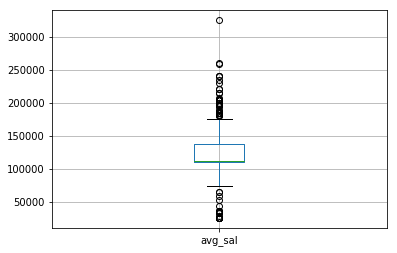

In [8]:
df.boxplot('avg_sal')

In [9]:
df.avg_sal.min(), df.avg_sal.max()

(26000.0, 325000.0)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


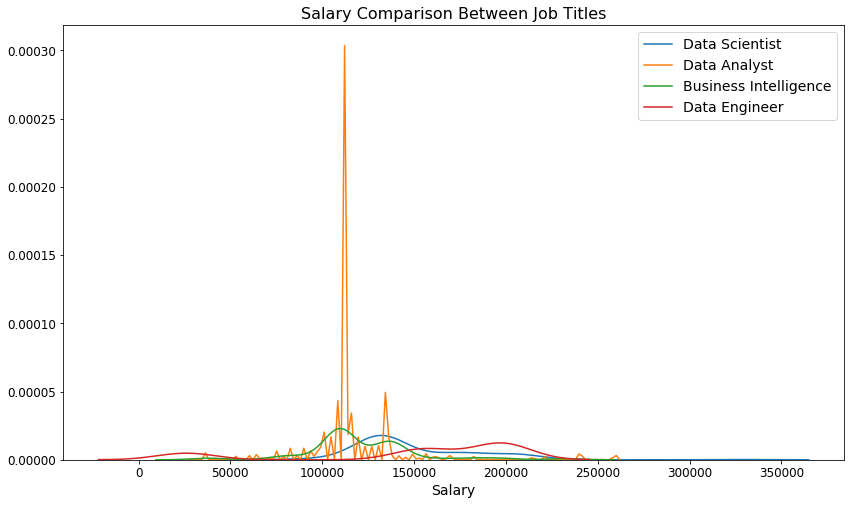

In [10]:
# Salaries by Title
fig, ax = plt.subplots(1,1, figsize=(14,8))
for job in ['Data Scientist', 'Data Analyst', 'Business Intelligence', 'Data Engineer']:
    sns.kdeplot(df[df['title_fix']==job]['avg_sal'], shade=False, ax=ax, label=job)

plt.title('Salary Comparison Between Job Titles', fontsize=16)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.show()

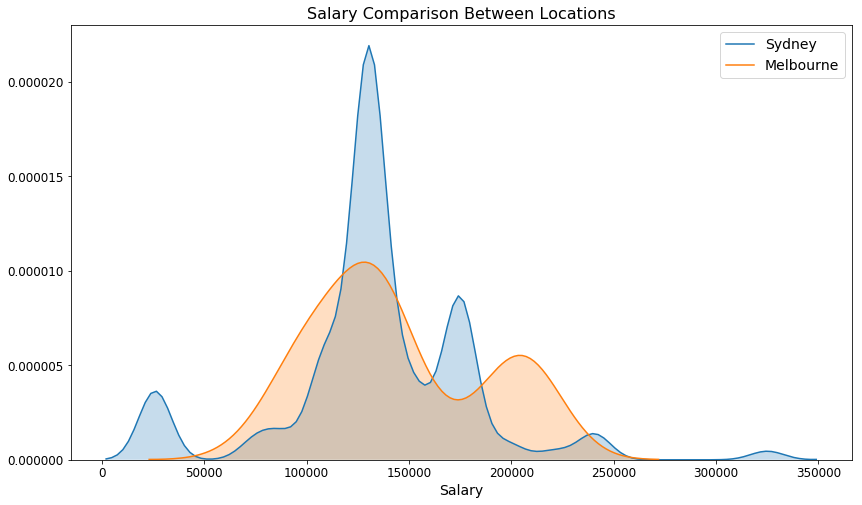

In [11]:
# Salaries by Location
fig, ax = plt.subplots(1,1, figsize=(14,8))
for city in ['Sydney', 'Melbourne']:
    sns.kdeplot(df[df['location'].str.contains(city)]['avg_sal'], shade=True, label=city)

plt.title('Salary Comparison Between Locations', fontsize=16)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.show()


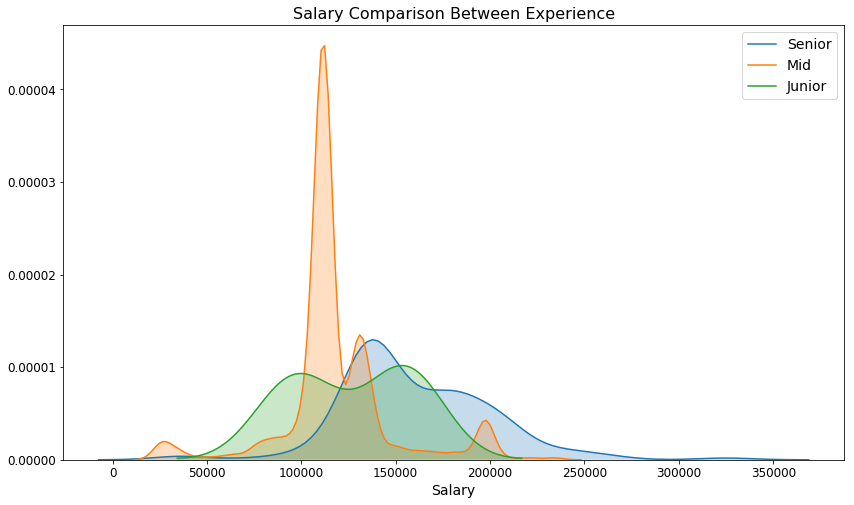

In [12]:
# Salaries by experience
fig, ax = plt.subplots(1,1, figsize=(14,8))
for city in df['experience'].unique():
    sns.kdeplot(df[df['experience'].str.contains(city)]['avg_sal'], shade=True, label=city)

plt.title('Salary Comparison Between Experience', fontsize=16)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.show()


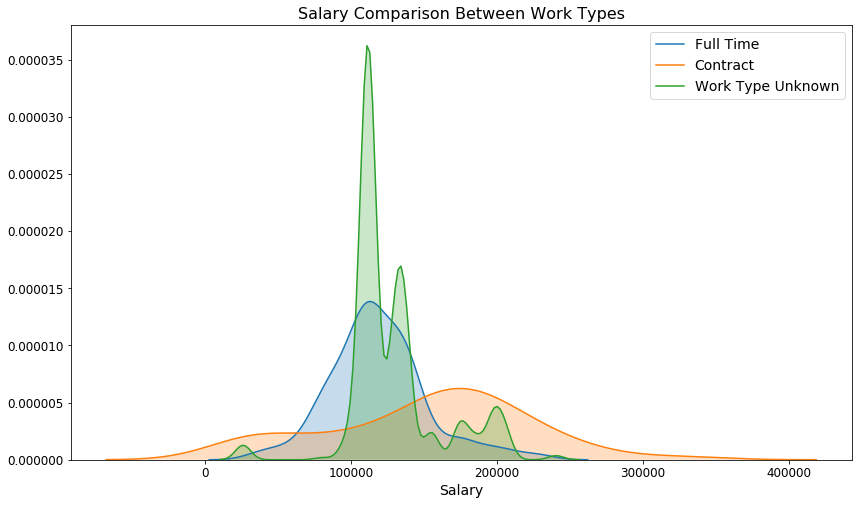

In [13]:
# Salaries by work type
fig, ax = plt.subplots(1,1, figsize=(14,8))
for city in df['work_type'].unique():
    sns.kdeplot(df[df['work_type'].str.contains(city)]['avg_sal'], shade=True, label=city)

plt.title('Salary Comparison Between Work Types', fontsize=16)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.show()


In [253]:
## Categorize salary

In [254]:
# identify above and below median salaries
sal_avg = pd.DataFrame(data.groupby(['title_fix', 'experience','location'])['avg_sal'].median()).reset_index()
sal_avg 

,title_fix,experience,location,avg_sal
0,Business Analyst,Mid,Location Unknown,110000.0
1,Business Analyst,Mid,Melbourne,100000.0
2,Business Analyst,Mid,Sydney,110000.0
3,Business Analyst,Senior,Location Unknown,185250.0
4,Business Intelligence,Mid,Location Unknown,110000.0
5,Business Intelligence,Mid,Melbourne,80000.0
6,Business Intelligence,Mid,Sydney,110000.0
7,Business Intelligence,Senior,Location Unknown,137500.0
8,Business Intelligence,Senior,Melbourne,130000.0
9,Business Intelligence,Senior,Sydney,140000.0


In [255]:
sal_avg.rename(columns={'avg_sal': 'sal_median'}, inplace=True)

In [256]:
x_data = pd.merge(left=final_data, right=sal_avg, how='left', on=['title_fix','experience','location'])
print(x_data.shape)
x_data.head()

(570, 18)


,Company,Description,Link,Location,Salary,Salary_int,Title,Unnamed: 0,experience,location,max_sal,min_sal,sal_freq,title_fix,work_type,freq_val,avg_sal,sal_median
0,Algorithmic Trading Strategies Pty Ltd,We are looking for an experienced Data Scienti...,https://au.indeed.com/company/Algorithmic-Trad...,Sydney Central Business District NSW,"$160,000 - $180,000 a year",160000-180000,Senior Data Scientist,9,Senior,Sydney,180000.0,160000.0,year,Data Scientist,Full Time,1.0,170000.0,175000.0
1,Accenture,Are you curious about how digital is changing ...,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Sydney NSW,"$110,000 - $150,000 a year",110000-150000,Artificial Intelligence- Virtual A...,14,Mid,Sydney,150000.0,110000.0,year,Data Scientist,Full Time,1.0,130000.0,130000.0
2,Quantexa,We are looking for individuals with a proven t...,https://au.indeed.com/rc/clk?jk=43597fa4327016...,Sydney NSW,"$71,000 - $94,000 a year",71000-94000,Data Scientist/ Engineer,21,Mid,Sydney,94000.0,71000.0,year,Data Scientist,Full Time,1.0,82500.0,130000.0
3,Freelancer.com,Eleven-time Webby award-winning Freelancer.com...,https://au.indeed.com/rc/clk?jk=56398451dd58fd...,Sydney NSW,"$70,000 - $110,000 a year",70000-110000,Data Scientist - Sydney,23,Mid,Sydney,110000.0,70000.0,year,Data Scientist,Full Time,1.0,90000.0,130000.0
4,Correlate Resources,Our client is an Australian market leader in t...,https://au.indeed.com/rc/clk?jk=ddc0aa1d153a01...,Sydney NSW,$600 a day,600,Junior Data Scientist (Retail Loya...,52,Junior,Sydney,156000.0,156000.0,day,Data Scientist,Contract,260.0,156000.0,156000.0


In [257]:
def high_low_median(row):
    if row['avg_sal'] > row['sal_median']:
        return 'H'
    else:
        return 'L'

In [258]:
# apply function
x_data['gt_lt_median'] = x_data.apply (lambda row: high_low_median(row), axis=1)

In [259]:
x_data.gt_lt_median.value_counts()

L    502
H     68
Name: gt_lt_median, dtype: int64

In [260]:
x_data.head()

,Company,Description,Link,Location,Salary,Salary_int,Title,Unnamed: 0,experience,location,max_sal,min_sal,sal_freq,title_fix,work_type,freq_val,avg_sal,sal_median,gt_lt_median
0,Algorithmic Trading Strategies Pty Ltd,We are looking for an experienced Data Scienti...,https://au.indeed.com/company/Algorithmic-Trad...,Sydney Central Business District NSW,"$160,000 - $180,000 a year",160000-180000,Senior Data Scientist,9,Senior,Sydney,180000.0,160000.0,year,Data Scientist,Full Time,1.0,170000.0,175000.0,L
1,Accenture,Are you curious about how digital is changing ...,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Sydney NSW,"$110,000 - $150,000 a year",110000-150000,Artificial Intelligence- Virtual A...,14,Mid,Sydney,150000.0,110000.0,year,Data Scientist,Full Time,1.0,130000.0,130000.0,L
2,Quantexa,We are looking for individuals with a proven t...,https://au.indeed.com/rc/clk?jk=43597fa4327016...,Sydney NSW,"$71,000 - $94,000 a year",71000-94000,Data Scientist/ Engineer,21,Mid,Sydney,94000.0,71000.0,year,Data Scientist,Full Time,1.0,82500.0,130000.0,L
3,Freelancer.com,Eleven-time Webby award-winning Freelancer.com...,https://au.indeed.com/rc/clk?jk=56398451dd58fd...,Sydney NSW,"$70,000 - $110,000 a year",70000-110000,Data Scientist - Sydney,23,Mid,Sydney,110000.0,70000.0,year,Data Scientist,Full Time,1.0,90000.0,130000.0,L
4,Correlate Resources,Our client is an Australian market leader in t...,https://au.indeed.com/rc/clk?jk=ddc0aa1d153a01...,Sydney NSW,$600 a day,600,Junior Data Scientist (Retail Loya...,52,Junior,Sydney,156000.0,156000.0,day,Data Scientist,Contract,260.0,156000.0,156000.0,L


In [261]:
# Categorise Salaries
def T_cat(row):
    if row['title_fix'] == 'Data Scientist':
        return  'DS'
    elif row['title_fix'] == 'Data Analyst':
        return  'DA'
    elif row['title_fix'] == 'Business Intelligence':
        return 'BI'
    elif row['title_fix'] == 'Data Engineer':
        return 'DE'
    elif row['title_fix'] == 'Business Analyst':
        return 'BA'
    else:
        return 'Title Unknown'


In [262]:
def E_cat(row):
    if row['experience'] == 'Senior':
        return 'S'
    elif row['experience'] == 'Mid':
        return 'M'
    elif row['experience'] == 'Junior':
        return 'J'
    else:
        return 'Experience Unknown'

In [263]:
def L_cat(row):
    if row['location'] == 'Sydney':
        return 'S'
    elif row['location'] == 'Melbourne':
        return  'M'
    else:
        return 'Location Unknown'

In [264]:
# apply functions
x_data['T_Cat']= x_data.apply (lambda row: T_cat(row), axis=1)
x_data['E_Cat']= x_data.apply (lambda row: E_cat(row), axis=1)


In [265]:
x_data.head()

,Company,Description,Link,Location,Salary,Salary_int,Title,Unnamed: 0,experience,location,...,min_sal,sal_freq,title_fix,work_type,freq_val,avg_sal,sal_median,gt_lt_median,T_Cat,E_Cat
0,Algorithmic Trading Strategies Pty Ltd,We are looking for an experienced Data Scienti...,https://au.indeed.com/company/Algorithmic-Trad...,Sydney Central Business District NSW,"$160,000 - $180,000 a year",160000-180000,Senior Data Scientist,9,Senior,Sydney,...,160000.0,year,Data Scientist,Full Time,1.0,170000.0,175000.0,L,DS,S
1,Accenture,Are you curious about how digital is changing ...,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Sydney NSW,"$110,000 - $150,000 a year",110000-150000,Artificial Intelligence- Virtual A...,14,Mid,Sydney,...,110000.0,year,Data Scientist,Full Time,1.0,130000.0,130000.0,L,DS,M
2,Quantexa,We are looking for individuals with a proven t...,https://au.indeed.com/rc/clk?jk=43597fa4327016...,Sydney NSW,"$71,000 - $94,000 a year",71000-94000,Data Scientist/ Engineer,21,Mid,Sydney,...,71000.0,year,Data Scientist,Full Time,1.0,82500.0,130000.0,L,DS,M
3,Freelancer.com,Eleven-time Webby award-winning Freelancer.com...,https://au.indeed.com/rc/clk?jk=56398451dd58fd...,Sydney NSW,"$70,000 - $110,000 a year",70000-110000,Data Scientist - Sydney,23,Mid,Sydney,...,70000.0,year,Data Scientist,Full Time,1.0,90000.0,130000.0,L,DS,M
4,Correlate Resources,Our client is an Australian market leader in t...,https://au.indeed.com/rc/clk?jk=ddc0aa1d153a01...,Sydney NSW,$600 a day,600,Junior Data Scientist (Retail Loya...,52,Junior,Sydney,...,156000.0,day,Data Scientist,Contract,260.0,156000.0,156000.0,L,DS,J


In [266]:
x_data['sal_cat'] = x_data['gt_lt_median'].str.cat(x_data[['T_Cat']])

In [267]:
x_data.head()

,Company,Description,Link,Location,Salary,Salary_int,Title,Unnamed: 0,experience,location,...,sal_freq,title_fix,work_type,freq_val,avg_sal,sal_median,gt_lt_median,T_Cat,E_Cat,sal_cat
0,Algorithmic Trading Strategies Pty Ltd,We are looking for an experienced Data Scienti...,https://au.indeed.com/company/Algorithmic-Trad...,Sydney Central Business District NSW,"$160,000 - $180,000 a year",160000-180000,Senior Data Scientist,9,Senior,Sydney,...,year,Data Scientist,Full Time,1.0,170000.0,175000.0,L,DS,S,LDS
1,Accenture,Are you curious about how digital is changing ...,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Sydney NSW,"$110,000 - $150,000 a year",110000-150000,Artificial Intelligence- Virtual A...,14,Mid,Sydney,...,year,Data Scientist,Full Time,1.0,130000.0,130000.0,L,DS,M,LDS
2,Quantexa,We are looking for individuals with a proven t...,https://au.indeed.com/rc/clk?jk=43597fa4327016...,Sydney NSW,"$71,000 - $94,000 a year",71000-94000,Data Scientist/ Engineer,21,Mid,Sydney,...,year,Data Scientist,Full Time,1.0,82500.0,130000.0,L,DS,M,LDS
3,Freelancer.com,Eleven-time Webby award-winning Freelancer.com...,https://au.indeed.com/rc/clk?jk=56398451dd58fd...,Sydney NSW,"$70,000 - $110,000 a year",70000-110000,Data Scientist - Sydney,23,Mid,Sydney,...,year,Data Scientist,Full Time,1.0,90000.0,130000.0,L,DS,M,LDS
4,Correlate Resources,Our client is an Australian market leader in t...,https://au.indeed.com/rc/clk?jk=ddc0aa1d153a01...,Sydney NSW,$600 a day,600,Junior Data Scientist (Retail Loya...,52,Junior,Sydney,...,day,Data Scientist,Contract,260.0,156000.0,156000.0,L,DS,J,LDS


In [268]:
x_data.drop(['E_Cat','T_Cat','gt_lt_median','sal_median' ], axis=1,inplace=True)

In [269]:
data = x_data[['title_fix','Company','Link','Description','location',
              'work_type','experience','sal_freq', 'min_sal','max_sal',
             'avg_sal','sal_cat']]

In [270]:
data.head()

,title_fix,Company,Link,Description,location,work_type,experience,sal_freq,min_sal,max_sal,avg_sal,sal_cat
0,Data Scientist,Algorithmic Trading Strategies Pty Ltd,https://au.indeed.com/company/Algorithmic-Trad...,We are looking for an experienced Data Scienti...,Sydney,Full Time,Senior,year,160000.0,180000.0,170000.0,LDS
1,Data Scientist,Accenture,https://au.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Are you curious about how digital is changing ...,Sydney,Full Time,Mid,year,110000.0,150000.0,130000.0,LDS
2,Data Scientist,Quantexa,https://au.indeed.com/rc/clk?jk=43597fa4327016...,We are looking for individuals with a proven t...,Sydney,Full Time,Mid,year,71000.0,94000.0,82500.0,LDS
3,Data Scientist,Freelancer.com,https://au.indeed.com/rc/clk?jk=56398451dd58fd...,Eleven-time Webby award-winning Freelancer.com...,Sydney,Full Time,Mid,year,70000.0,110000.0,90000.0,LDS
4,Data Scientist,Correlate Resources,https://au.indeed.com/rc/clk?jk=ddc0aa1d153a01...,Our client is an Australian market leader in t...,Sydney,Contract,Junior,day,156000.0,156000.0,156000.0,LDS


In [271]:
data.to_csv('./data/final_data.csv')